In [1]:
import pandas as pd
import matplotlib.pyplot as plt


##Temperature dataset Link: 
https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3_en.php?block_no=47401&v
##Solar and demand dataset: 
https://www.renewable-ei.org/en/statistics/electricity/#demand

In [38]:
data = pd.ExcelFile('C:/Users/REI-K0103/Desktop/JupyterFile/temperature_dataa.xlsx')
df = pd.read_excel(data, 'Sheet2')
df2 = pd.read_excel(data, "Sheet3")

In [39]:
df.describe()

,Year,Jan,Feb,Mar,Apr,May,Aug,Sep,Oct,Nov,Annual
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.00000,87.000000,87.000000,87.000000,87.000000
mean,1981.000000,-3.167816,-2.793103,1.271264,7.308046,12.154023,22.42069,19.880460,13.842529,6.027586,9.400460
std,25.258662,1.522811,1.505555,1.380336,1.327545,1.472761,1.78085,1.096701,1.028391,1.470460,0.701639
min,1938.000000,-6.800000,-6.600000,-1.500000,4.300000,7.900000,18.60000,17.400000,11.300000,1.500000,7.800000
25%,1959.500000,-4.250000,-3.750000,0.300000,6.600000,11.200000,21.00000,19.000000,13.050000,5.100000,8.850000
50%,1981.000000,-2.900000,-2.800000,1.300000,7.200000,12.100000,22.60000,19.900000,14.000000,6.100000,9.500000
75%,2002.500000,-2.100000,-1.900000,2.000000,8.200000,13.050000,23.90000,20.600000,14.550000,7.000000,9.800000
max,2024.000000,0.000000,1.000000,6.000000,10.800000,16.700000,26.20000,22.900000,16.100000,9.000000,11.200000


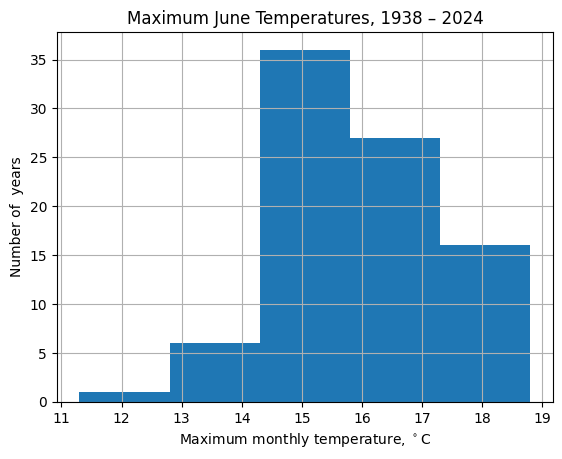

In [40]:
import matplotlib.pyplot as plt
df['Jun'] = pd.to_numeric(df['Jun'], errors='coerce')

df['Jun'].hist(bins=5)
plt.xlabel(r'Maximum monthly temperature, $^\circ\mathrm{C}$')
plt.ylabel('Number of  years')
plt.title('Maximum June Temperatures, 1938 – 2024')
plt.show()

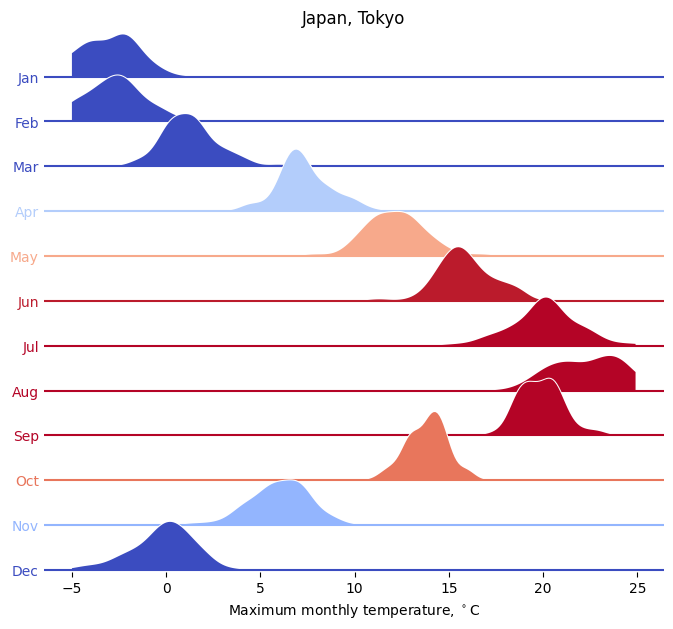

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from scipy.stats import gaussian_kde

DPI = 100

def plot_monthly_temperatures(filename, ax, title):
    """Make a ridgeline plot from the temperatures on Axes ax."""

    # Read the data into a pandas DataFrame.
    df = pd.read_csv(filename, sep='\s+', skiprows=5, header=0,
                     index_col=0).dropna()
    # The months are identified as the first 12 column names.
    months = df.columns[:12]
    # Get the mean temperatures across all years for each month.
    meanT = df[months].mean()
    # For a single plot, we might just take the min and max for that region.
    #minT, maxT = np.min(meanT), np.max(meanT)
    # But to properly compare across regions, set these to their values across
    # both regions.
    minT, maxT = 2.31, 16.19
    norm = Normalize(vmin=minT, vmax=maxT)

    # The temperature grid to plot the distributions on.
    T = np.arange(-5, 25, 0.1)

    # A colormap: blue (cold) to red (warm).
    cmap = plt.get_cmap('coolwarm')

    # Offset each plot vertically by this amount. It looks nice if they overlap.
    offset = 0.25
    # The y-axis ticks are the month names.
    ax.yaxis.set_tick_params(length=0, width=0)
    ax.set_ylim(-0.01, 12*offset)
    ax.set_yticks(np.arange(0, 12*offset, offset))
    ax.set_yticklabels(months[::-1].str.title())
    yticklabels = ax.yaxis.get_ticklabels()

    for i, month in enumerate(months[::-1]):
        c = cmap(norm(meanT[month]))
        dist = gaussian_kde(df[month])
        # Plot the distribution in white, which acts as an outline to the
        # filled region (in an appropriate colour) under each line.
        ax.plot(T, dist(T) + i * offset, c='w', zorder=15-i)
        ax.fill_between(T, dist(T) + i * offset, i * offset, fc=c, zorder=15-i) 
        # Complete with a base line across the width of the plot.
        ax.axhline(i * offset, c=c, zorder=15-i)
        # Also set the month name to the same colour as the plot.
        yticklabels[i].set_color(c)

    ax.set_xlabel(r'Maximum monthly temperature, $^\circ\mathrm{C}$')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_title(title)

# Create a single plot.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(800/DPI, 600/DPI), dpi=DPI)
filename = 'dataa.txt'
plot_monthly_temperatures(filename, ax, 'Japan, Tokyo')
plt.subplots_adjust(top=0.95, bottom=0.05)
#plt.savefig('temps-kde.png', dpi=DPI)
plt.show()

In [42]:
df2.describe()


,date,solar,demand,price
count,720,720.000000,720.000000,720.000000
mean,2023-06-15 12:00:00,2840.972222,29500.333333,10.825819
min,2023-06-01 00:00:00,0.000000,20000.000000,0.010000
25%,2023-06-08 00:00:00,0.000000,24355.000000,9.160000
50%,2023-06-15 12:00:00,525.000000,29145.000000,10.625000
75%,2023-06-23 00:00:00,4612.500000,33405.000000,12.295000
max,2023-06-30 00:00:00,15060.000000,46580.000000,17.980000
std,NaN,4021.335782,5688.769030,2.746536


In [43]:
import plotly.express as px

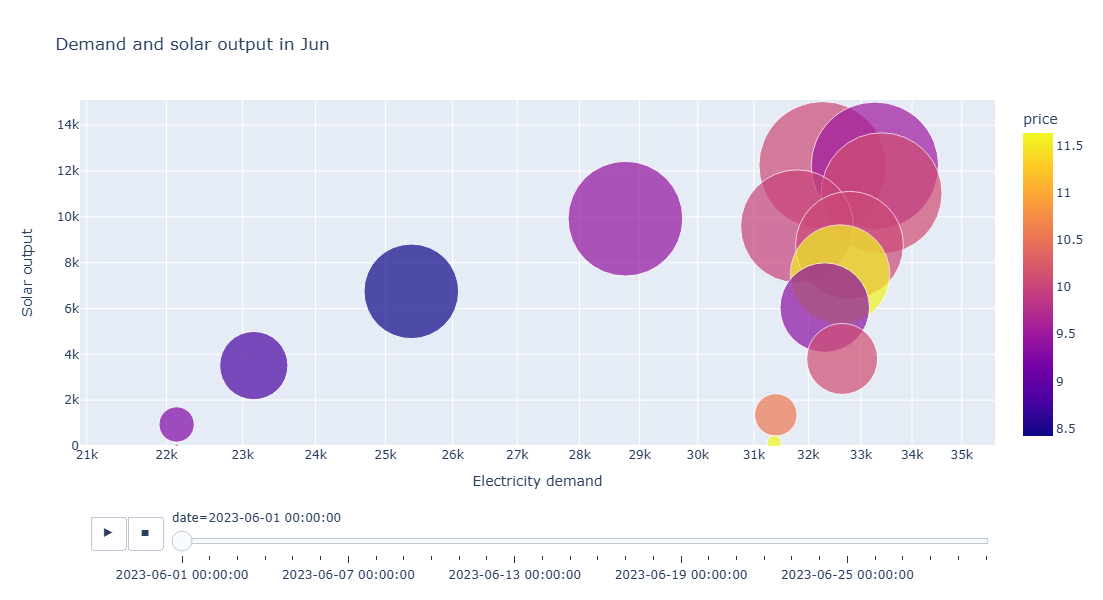

In [44]:
px.scatter(df2, x= 'demand', y = 'solar',
          size = 'solar',
          color = 'price',
          title = 'Demand and solar output in Jun',
          labels = {'solar': 'Solar output',
                    'demand': 'Electricity demand'},
          log_x = True,
          range_y = [0, 15100],
           hover_name = 'price',
           animation_frame = 'date',
           height = 600,
           size_max = 100)